In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [26]:
W_true = 2
b_true = 0.5

In [27]:
x = np.linspace(0, 3, 130)
y = W_true * x + b_true + np.random.randn(*x.shape) * 0.5

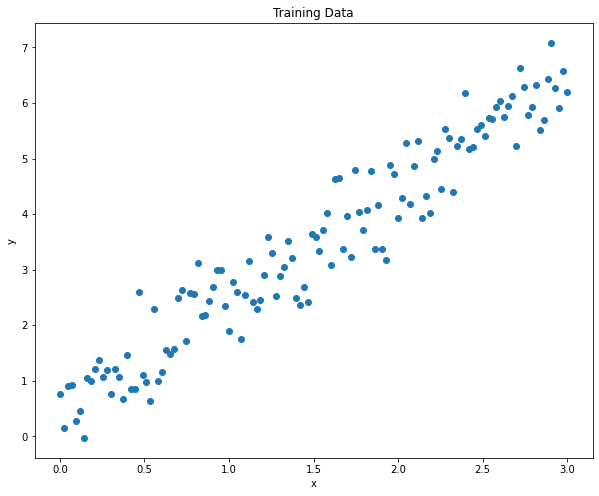

In [28]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y)
plt.title('Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show();

In [29]:
class LinearModel:

    def __init__(self):
        self.weight = tf.Variable(np.random.randn(), name='weight')
        self.bias = tf.Variable(np.random.randn(), name='bias')
    

    def __call__(self, x):
        return self.weight * x + self.bias

In [30]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

In [31]:
def train(model, x, y, lr=0.01):

    with tf.GradientTape() as tape:
        y_pred = model(x)
        loss_value = loss(y, y_pred)
    
    d_w, d_b = tape.gradient(loss_value, [model.weight, model.bias])

    model.weight.assign_sub(lr * d_w)
    model.bias.assign_sub(lr * d_b)

    return loss_value

In [32]:
linear_model = LinearModel()
weights, biases = [], []
EPOCHS = 1000
LR = 0.01

In [33]:
for epoch in range(1, EPOCHS + 1):

  weights.append(linear_model.weight.numpy())
  biases.append(linear_model.bias.numpy())

  real_loss = train(linear_model, x, y, lr=LR)

  if epoch % 100 == 0:
    print(f'Epoch: [{epoch}/{EPOCHS}] | Loss: {real_loss.numpy()}')

Epoch: [100/1000] | Loss: 0.2849855124950409
Epoch: [200/1000] | Loss: 0.2616950571537018
Epoch: [300/1000] | Loss: 0.2512393891811371
Epoch: [400/1000] | Loss: 0.2465452402830124
Epoch: [500/1000] | Loss: 0.24443775415420532
Epoch: [600/1000] | Loss: 0.24349159002304077
Epoch: [700/1000] | Loss: 0.24306680262088776
Epoch: [800/1000] | Loss: 0.2428760975599289
Epoch: [900/1000] | Loss: 0.24279047548770905
Epoch: [1000/1000] | Loss: 0.24275203049182892


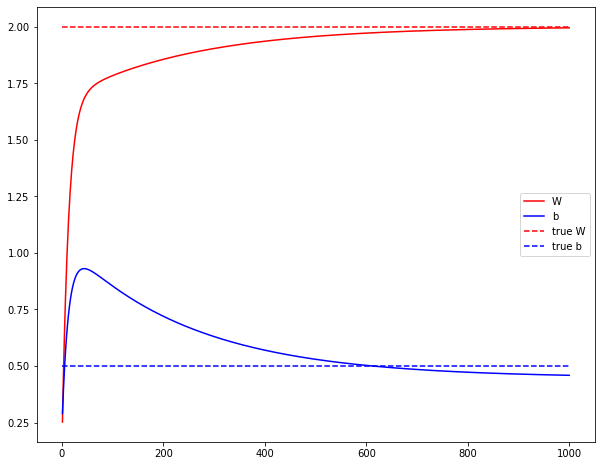

In [34]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, EPOCHS + 1), weights, 'r', range(1, EPOCHS + 1), biases, 'b')
plt.plot([W_true] * EPOCHS, 'r--', [b_true] * EPOCHS, 'b--')
plt.legend(['W', 'b', 'true W', 'true b'])
plt.show();

In [35]:
linear_model.weight.numpy(), linear_model.bias.numpy()

(1.9949903, 0.45880756)

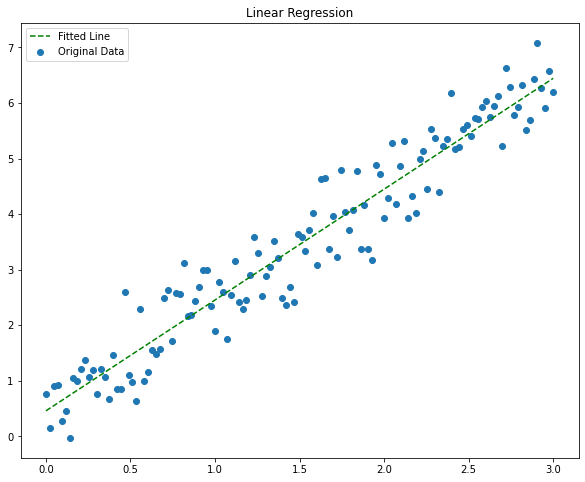

In [36]:
plt.figure(figsize=(10, 8))

plt.scatter(x, y, label = 'Original Data')
plt.plot(x, linear_model(x), 'g--', label = 'Fitted Line')

plt.title('Linear Regression')

plt.legend()
plt.show();

In [37]:
from tensorflow import keras
from tensorflow.keras import layers

In [42]:
model = keras.Sequential([layers.Dense(1, input_shape=(1,), activation='linear')])
optimizer = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='mse', metrics=['mse'], optimizer=optimizer)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(x, y, epochs=1000)

Epoch 1/1000
5/5 [==============================] - 0s 2ms/step - loss: 26.5877 - mse: 26.5877
Epoch 2/1000
5/5 [==============================] - 0s 2ms/step - loss: 24.5641 - mse: 24.5641
Epoch 3/1000
5/5 [==============================] - 0s 2ms/step - loss: 22.7483 - mse: 22.7483
Epoch 4/1000
5/5 [==============================] - 0s 3ms/step - loss: 20.8646 - mse: 20.8646
Epoch 5/1000
5/5 [==============================] - 0s 3ms/step - loss: 19.3452 - mse: 19.3452
Epoch 6/1000
5/5 [==============================] - 0s 3ms/step - loss: 17.7641 - mse: 17.7641
Epoch 7/1000
5/5 [==============================] - 0s 4ms/step - loss: 16.4200 - mse: 16.4200
Epoch 8/1000
5/5 [==============================] - 0s 3ms/step - loss: 15.2342 - mse: 15.2342
Epoch 9/1000
5/5 [==============================] - 0s 4ms/step - loss: 13.9111 - mse: 13.9111
Epoch 10/1000
5/5 [==============================] - 0s 4ms/step - loss: 12.9786 - mse: 12.9786
Epoch 11/1000
5/5 [==============================

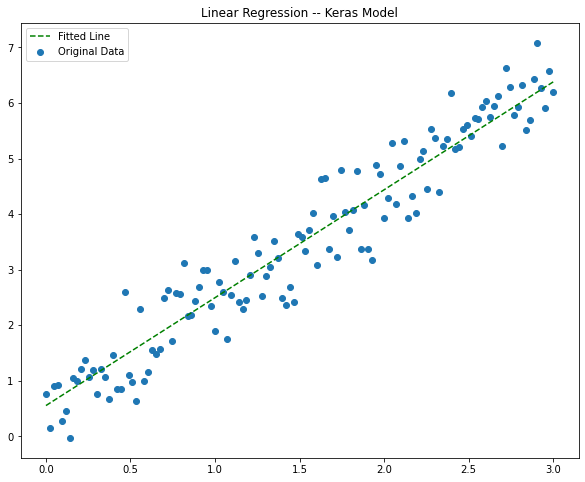

In [44]:
plt.figure(figsize=(10, 8))

plt.scatter(x, y, label = 'Original Data')
plt.plot(x, model.predict(x), 'g--', label = 'Fitted Line')

plt.title('Linear Regression -- Keras Model')

plt.legend()
plt.show();

In [45]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9420711]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.5533962], dtype=float32)>]